<h2>Baseline gradient boosted decision tree model trained using LightGBM </h2>

In [1]:
import os
import numpy as np
from matplotlib import pyplot as plt
import lightgbm as lgb
import pandas as pd
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from tabulate import tabulate

In [2]:
ember2018 = '../Dataset/ember_zip/ember2018'

<h4> Train and Test Datset loaded </h4>

In [3]:

train_dataset = np.load(os.path.join(ember2018,'ember2018_train_data.npz'),allow_pickle=True)
X_train, y_train= train_dataset['arr_0'],train_dataset['arr_1']
test_dataset = np.load(os.path.join(ember2018,'ember2018_test_data.npz'),allow_pickle=True)
X_test,y_test = test_dataset['arr_0'],test_dataset['arr_1']

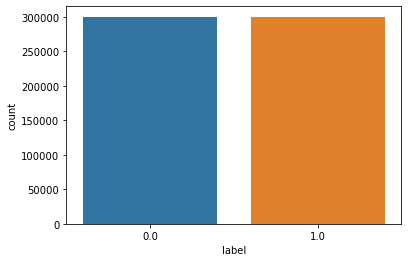

In [4]:
df = pd.DataFrame(data=y_train, columns=["label"])
sns.countplot(x = 'label', data=df);


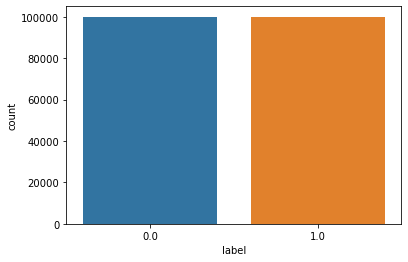

In [5]:
df = pd.DataFrame(data=y_test, columns=["label"])
sns.countplot(x = 'label', data=df);


<h4> A simple LightGBM model is trained and tested with default params </h4

In [6]:
params = {
    "boosting": "gbdt",
}
lgbm_dataset = lgb.Dataset(X_train, y_train)
lgbm_model = lgb.train(params, lgbm_dataset)
lgbm_model.save_model(os.path.join(ember2018, "model2018.txt"))

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 61.023586 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 212057
[LightGBM] [Info] Number of data points in the train set: 600000, number of used features: 2333
[LightGBM] [Info] Start training from score 0.500000


In [35]:
lgbm_model = lgb.Booster(model_file=os.path.join(ember2018,"model2018.txt"))

In [36]:
y_test_pred = lgbm_model.predict(X_test)
y_train_pred = lgbm_model.predict(X_train)
print (y_test_pred[:10])

[ 1.00337967  0.17395378  1.0968505   0.11058255  0.00546004  1.01191492
  0.06304254 -0.07678607  0.95925355  0.29313985]


<h5> It can be observed that with simple model with default params 100 trees and number of leaves 31 </h5>
<h5>  train accuarcy was 100% , test accuracy obtained was 93% it took very less time to train</h5>
<h5> The corresponding Confusion matrix and classification reports shown below </h5>

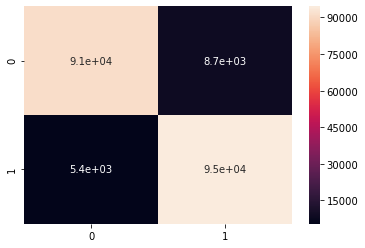

In [9]:
y_test_pred = np.where(y_test_pred > 0.5, 1, 0)
y_train_pred = np.where(y_train > 0.5, 1, 0)
confusion_matrix_df = pd.DataFrame(confusion_matrix(y_test, y_test_pred))
sns.heatmap(confusion_matrix_df, annot=True);

In [10]:
print(classification_report(y_test, y_test_pred))


              precision    recall  f1-score   support

         0.0       0.94      0.91      0.93    100000
         1.0       0.92      0.95      0.93    100000

    accuracy                           0.93    200000
   macro avg       0.93      0.93      0.93    200000
weighted avg       0.93      0.93      0.93    200000



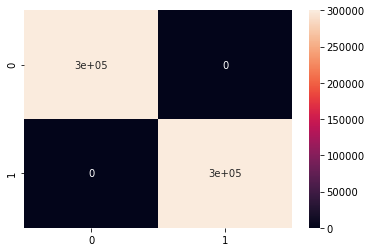

In [11]:
confusion_matrix_df = pd.DataFrame(confusion_matrix(y_train, y_train_pred))

sns.heatmap(confusion_matrix_df, annot=True);

In [12]:
print(classification_report(y_train, y_train_pred))


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    300000
         1.0       1.00      1.00      1.00    300000

    accuracy                           1.00    600000
   macro avg       1.00      1.00      1.00    600000
weighted avg       1.00      1.00      1.00    600000



<h4> ember_model_2018.txt is a pretrained model provided by ember </h4>
<h5> It was trained using the parameters params = {
            "boosting": "gbdt",
            "objective": "binary",
            "num_iterations": 1000,
            "learning_rate": 0.05,
            "num_leaves": 2048,
            "max_depth": 15,
            "min_data_in_leaf": 50,
            "feature_fraction": 0.5
        } </h5>


<h5> we can observe the model sizes below, model with deafult params having size 380kB where as model
    with higher params having size 121MB </h5>

In [41]:
ls -l ../Dataset/ember_zip/ember2018/*.txt

-rw-r--r-- 1 mcs192792 mcs19 127284141 Jul 30  2019 ../Dataset/ember_zip/ember2018/ember_model_2018.txt
-rw-r--r-- 1 mcs192792 mcs19    389298 May 15 12:39 ../Dataset/ember_zip/ember2018/model2018.txt


<h5> After parameter tuning and by increasing the capacity of the dtree test accuracy was improved to 98% </h5>
<h5> The corresponding Confusion matrix and classification reports shown below </h5>

In [13]:
lgbm_model = lgb.Booster(model_file=os.path.join(ember2018,"ember_model_2018.txt"))

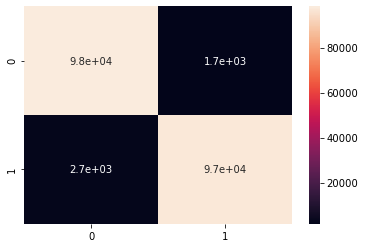

In [14]:
y_test_pred = lgbm_model.predict(X_test)
y_train_pred = lgbm_model.predict(X_train)
y_test_pred = np.where(y_test_pred > 0.5, 1, 0)
y_train_pred = np.where(y_train > 0.5, 1, 0)

confusion_matrix_df = pd.DataFrame(confusion_matrix(y_test, y_test_pred))

sns.heatmap(confusion_matrix_df, annot=True);

In [15]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

         0.0       0.97      0.98      0.98    100000
         1.0       0.98      0.97      0.98    100000

    accuracy                           0.98    200000
   macro avg       0.98      0.98      0.98    200000
weighted avg       0.98      0.98      0.98    200000



<h3> Experiment With Packer: </h3>
<h5> Generally Packers are used to compress the PEfiles. But the same are being used for encoding the PE files to 
Obfuscate Malware detectors. To check the perormance of the model aginst packers I have taken 26 clean files from windows and created varients of them using UPX packer. when tested against the model, it is observed that all the original files classified as benign. but one packed file detected as malware which is packed verison standard cmd.exe in windows</h5>

In [16]:
original_binaries_dir =   '../Dataset/executables/original'
packed_binaries_dir =   '../Dataset/executables/packed'

In [17]:
!ls '../Dataset/executables/packed'

CheckNetIsolation_pack.exe  fixmapi_pack.exe
chglogon_pack.exe	    fltMC_pack.exe
chgport_pack.exe	    help_pack.exe
chgusr_pack.exe		    icacls_pack.exe
chkdsk_pack.exe		    IcsEntitlementHost_pack.exe
chkntfs_pack.exe	    icsunattend_pack.exe
choice_pack.exe		    InfDefaultInstall_pack.exe
CIDiag_pack.exe		    iscsicpl_pack.exe
cipher_pack.exe		    ktmutil_pack.exe
cmd_pack.exe		    label_pack.exe
find_pack.exe		    Locator_pack.exe
findstr_pack.exe	    upx.exe
finger_pack.exe		    upx_pack.exe


In [18]:
!ls '../Dataset/executables/original'

CheckNetIsolation.exe  CIDiag.exe   fltMC.exe		    iscsicpl.exe
chglogon.exe	       cipher.exe   help.exe		    ktmutil.exe
chgport.exe	       cmd.exe	    HOSTNAME.EXE	    label.exe
chgusr.exe	       find.exe     icacls.exe		    Locator.exe
chkdsk.exe	       findstr.exe  IcsEntitlementHost.exe  upx.exe
chkntfs.exe	       finger.exe   icsunattend.exe
choice.exe	       fixmapi.exe  InfDefaultInstall.exe


In [19]:
from extract_binary_features import extract_features
from ember_dataset import create_data,read_metadata,read_vectorized_features


In [20]:
original_features = extract_features(original_binaries_dir,feature_version=2)
packed_features = extract_features(packed_binaries_dir,feature_version=2)

In [21]:
original_features.shape, packed_features.shape

((26, 2381), (26, 2381))

In [22]:
y_orig_pred = lgbm_model.predict(original_features)
y_orig_pred = np.where(y_orig_pred > 0.5, 1, 0)
print (y_orig_pred)


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [23]:
y_packed_pred = lgbm_model.predict(packed_features)
y_packed_pred = np.where(y_packed_pred > 0.5, 1, 0)
print (y_packed_pred)

[0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


<h3> Experiment With Sorel Datset on model trained using ember Dataset </h3>
<h5> test-features.npz and validation-features.npz are the files obtained from sorel datset which combinely contains
20 lakh malware features and 45 lakh beningn samples.</h5>

<h5>When tested 98% accuracy was obtained aginst these datasets. It is good to see that the model which was trained using 3 lakh samples was able to detect 20 lakh malwares well with 98% accuarcy. which means the model is generaizing well with all classes of the malwares. Results and confusion matrix can be seen below</h5>

In [24]:
sorel_dir = '../Dataset/sorel'

In [25]:

data = np.load(os.path.join(sorel_dir,'test-features.npz'))

data['arr_0'].shape

(4195042, 2381)

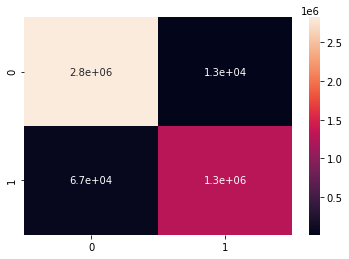

In [26]:
train = data['arr_0']
y_true= data['arr_1']
y_pred = lgbm_model.predict(train)
y_pred = np.where(y_pred > 0.5, 1, 0)
confusion_matrix_df = pd.DataFrame(confusion_matrix(y_true, y_pred))
sns.heatmap(confusion_matrix_df, annot=True);

In [27]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99   2834428
           1       0.99      0.95      0.97   1360614

    accuracy                           0.98   4195042
   macro avg       0.98      0.97      0.98   4195042
weighted avg       0.98      0.98      0.98   4195042



In [28]:

data = np.load(os.path.join(sorel_dir,'validation-features.npz'))
data['arr_0'].shape

(2495822, 2381)

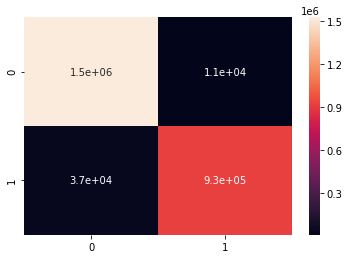

In [29]:
train = data['arr_0']
y_true= data['arr_1']
y_pred = lgbm_model.predict(train)
y_pred = np.where(y_pred > 0.5, 1, 0)
confusion_matrix_df = pd.DataFrame(confusion_matrix(y_true, y_pred))
sns.heatmap(confusion_matrix_df, annot=True);

In [30]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98   1533592
           1       0.99      0.96      0.98    962230

    accuracy                           0.98   2495822
   macro avg       0.98      0.98      0.98   2495822
weighted avg       0.98      0.98      0.98   2495822



<h3> Experiment with differrrent classes of malwares on model trained using ember Dataset </h3>
<h5> Tested the model with 11 classes of the malwares, it is observed that for the classes crypto_miner and downloader
the detection ration is very less compared to others around 60% the distribution of the malware sample from each class and the corressponding accuracies shown below.</h5>



In [31]:
data = np.load(os.path.join(sorel_dir,'sorel_data.npz'),allow_pickle=True)
data['arr_0'].shape,data['arr_1'].shape,

((54511, 2381), (54511, 13))

In [32]:
y_pred = lgbm_model.predict(data['arr_0'])
y_pred = np.where(y_pred > 0.5, 1, 0)
print("accuracy is: ", np.sum(y_pred)/len(y_pred))

accuracy is:  0.9274274916989231


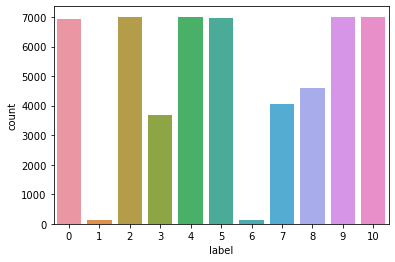

In [33]:
df = pd.DataFrame(data=data['arr_1'][:,-1], columns=["label"])
sns.countplot(x = 'label', data=df)

In [45]:
def per_label_detection(labels,y_pred):
    D = [[0,0] for range in np.unique(labels)]
    for l,y in zip(labels,y_pred):
        D[l][0] += 1
        D[l][1] += y
    return D
P = per_label_detection(data['arr_1'][:,-1],y_pred)


labels = ['adware', 'flooder', 'ransomware', 'dropper',
   'spyware', 'packed', 'crypto_miner', 'file_infector', 'installer',
   'worm', 'downloader']

table = []
for i,l in zip(P,labels):
    
    table.append([l,i[0],i[1], i[1]/i[0]])
print (tabulate(table,headers=['label', 'sample_count','samples_detected','accuracy']))


label            sample_count    samples_detected    accuracy
-------------  --------------  ------------------  ----------
adware                   6931                6043    0.87188
flooder                   142                 142    1
ransomware               7011                6993    0.997433
dropper                  3689                3661    0.99241
spyware                  6987                6858    0.981537
packed                   6972                6420    0.920826
crypto_miner              124                  81    0.653226
file_infector            4056                3816    0.940828
installer                4613                2769    0.60026
worm                     7000                6979    0.997
downloader               6986                6793    0.972373
